## Crea un módulo que contenga las siguientes funciones:

In [1]:
!pip install yfinance
!pip install plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px

plt.style.use('ggplot')

Leemos los datos tanto de fichero como de Yahoo Finance

In [2]:
sp500 = yf.download('^GSPC', start='2003-07-30', end='2019-05-15')
dax = yf.download('^GDAXI', start='2003-07-30', end='2019-05-15')
ftse = yf.download('^FTSE', start='2003-07-30', end='2019-05-15')
ibex_yf = yf.download('^IBEX', start='2003-07-30', end='2019-05-15')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
sp500.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-07-30,989.280029,992.619995,985.960022,987.489990,987.489990,1391900000
2003-07-31,987.489990,1004.590027,987.489990,990.309998,990.309998,1608000000
2003-08-01,990.309998,990.309998,978.859985,980.150024,980.150024,1390600000


In [7]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [5]:
sp500.loc['2018']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000
...,...,...,...,...,...,...
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613670000
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4249740000
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4139010000


In [9]:
import mplfinance as mpf

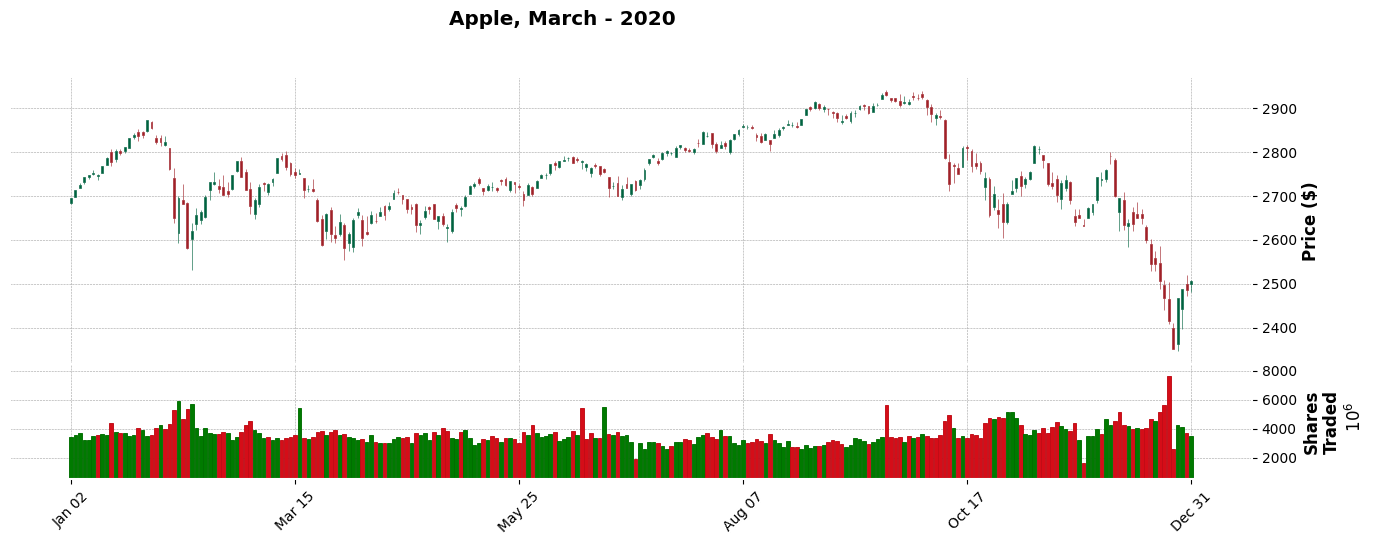

In [19]:
mpf.plot(
            sp500.loc['2018'],
            type='candle',
            style='charles',
            title='Apple, March - 2020',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            figratio=(30, 10),
            )

In [24]:
precios_df = pd.DataFrame({
    'SP500': sp500['Adj Close'],
    'DAX': dax['Adj Close'],
    'FTSE': ftse['Adj Close'],
    'IBEX': ibex_yf['Adj Close']
})

In [26]:
precios_df.head(3)

,SP500,DAX,FTSE,IBEX
Date,,,,
2003-07-30,987.489990,3429.030029,4141.200195,6984.292969
2003-07-31,990.309998,3487.860107,4157.000000,7061.692871
2003-08-01,980.150024,3438.889893,4098.399902,6995.392578


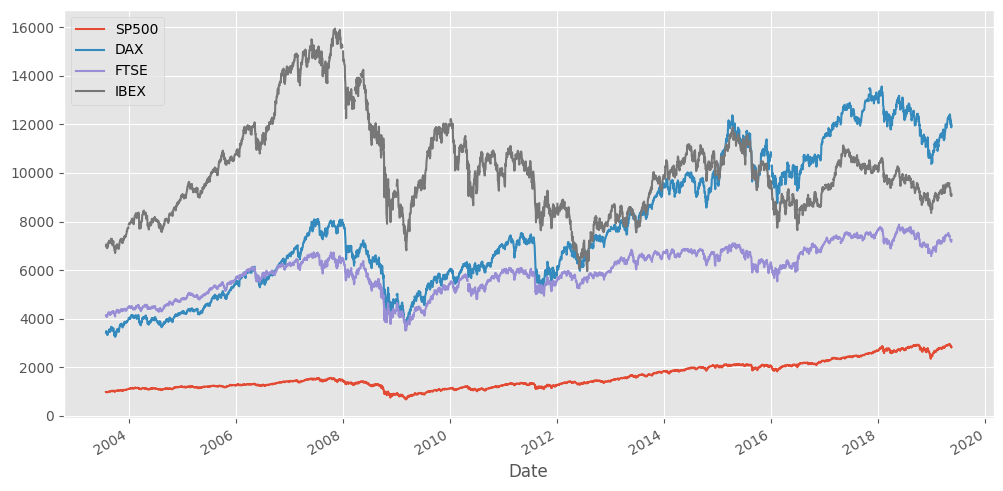

In [28]:
precios_df.plot(figsize=(12,6));

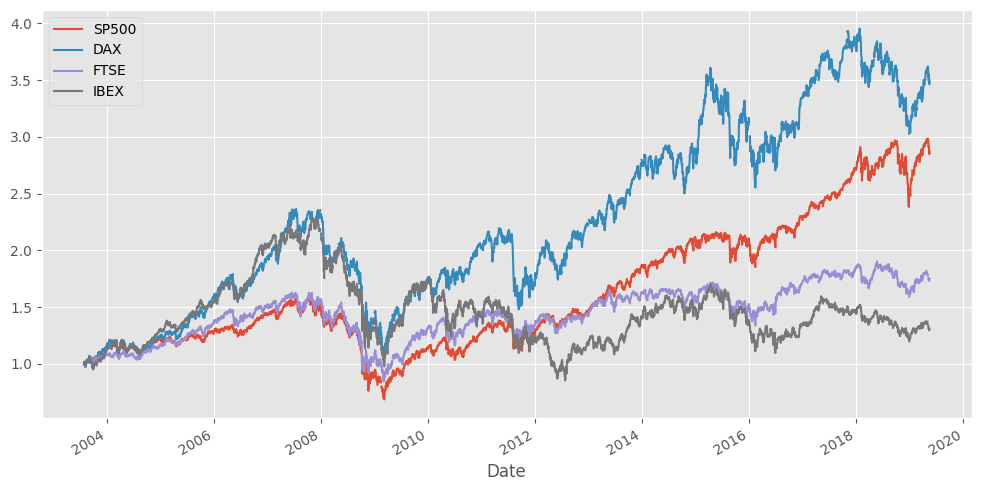

In [29]:
precios_unif_df = precios_df / precios_df.iloc[0]
precios_unif_df.plot(figsize=(12,6));

<Axes: xlabel='Date'>

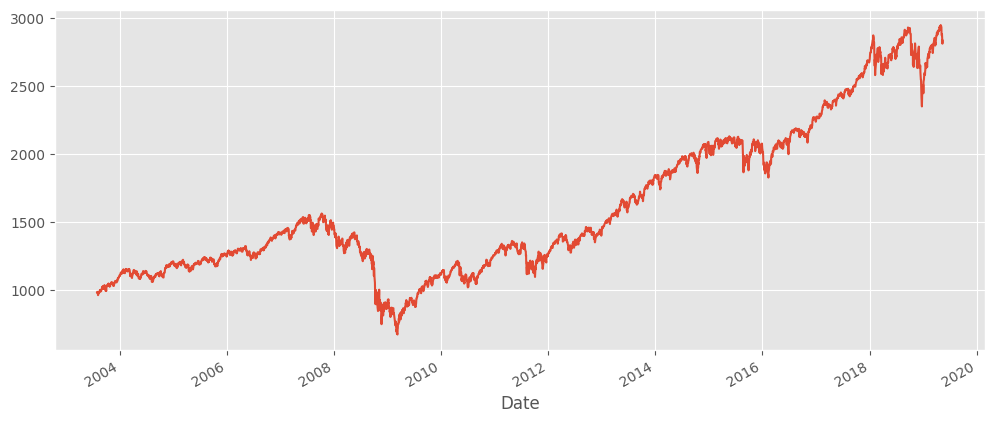

In [21]:
sp500.loc[:, 'Close'].plot(figsize=(12, 5))

In [3]:
# cargamos los datos

# para ejecutar en local
# ibex = pd.read_csv('data/ibex.csv', index_col=0, parse_dates=True).close
# ibex_div = pd.read_csv('data/ibex_div.csv', index_col=0, parse_dates=True).close

# para ejecutar en colab
ibex = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex.csv', index_col=0, parse_dates=True).close
ibex_div = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex_div.csv', index_col=0, parse_dates=True).close
data = pd.concat([ibex, ibex_div], axis=1).dropna()
data.columns = ['ibex', 'ibex_div']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4022 entries, 2003-07-30 to 2019-05-15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ibex      4022 non-null   float64
 1   ibex_div  4022 non-null   float64
dtypes: float64(2)
memory usage: 94.3 KB


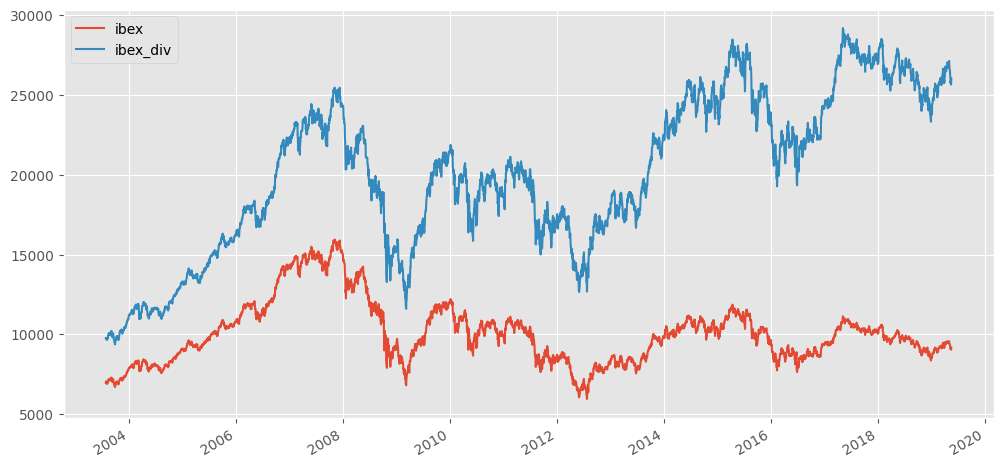

In [10]:
data.plot(figsize=(12, 6));

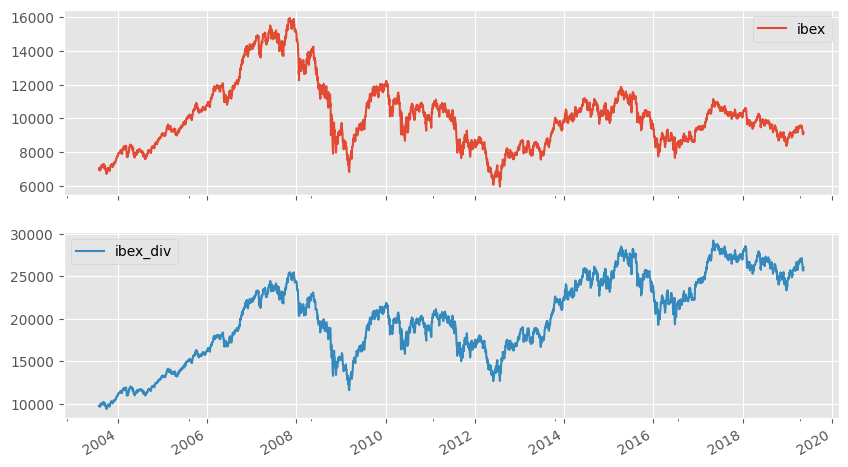

In [8]:
data.plot(subplots=True, figsize=(10, 6));

Calcula el retorno diario de un dataframe con los precios diarios

In [1]:
def retorno_diario(data):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    '''
    retornos = np.log(data).diff().dropna()
    return retornos


Calcula el retorno anualizado 

In [5]:
def retorno_anualizado(data):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    '''
    data_anual = data.resample('y').last()
    retornos = np.log(data_anual).diff().dropna()
    return retornos

Calcule la correlación rolada, con el periodo como parámetro

In [6]:
def correlacion(data, ventana=10):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    ventana: número de días para calcular la correlación
    '''
    corr = data.rolling(ventana).corr()
    return corr

Calcula la beta

In [7]:
def beta(data,index_col=0):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    '''
    retornos = retorno_diario(data)
    covariance_matrix = retornos.cov()
    variance = retornos.iloc[:,index_col].var()
    beta = covariance_matrix.iloc[:,index_col]/variance
    return beta

## Prueba tus funciones en los siguientes ejercicios, si crees que falta alguna función sientete libre de crearla.

Calcula la serie de retornos anuales  del Ibex con dividendos y del Ibex.

In [3]:
# cargamos los datos

# para ejecutar en local
# ibex = pd.read_csv('data/ibex.csv', index_col=0, parse_dates=True).close
# ibex_div = pd.read_csv('data/ibex_div.csv', index_col=0, parse_dates=True).close

# para ejecutar en colab
ibex = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex.csv', index_col=0, parse_dates=True).close
ibex_div = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex_div.csv', index_col=0, parse_dates=True).close
data = pd.concat([ibex, ibex_div], axis=1).dropna()
data.columns = ['ibex', 'ibex_div']

In [23]:
retornos_anuales = retorno_anualizado(data)

Realiza un gráfico de barras comparándolos.

<AxesSubplot:>

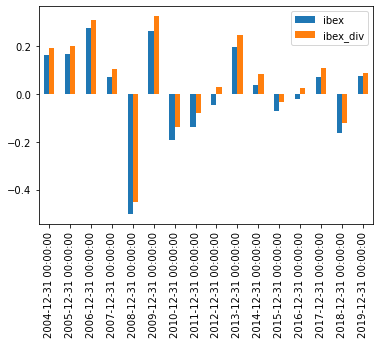

In [24]:
retornos_anuales.plot.bar()

Compara los retornos anuales del Ibex con los de SAN.

<Axes: >

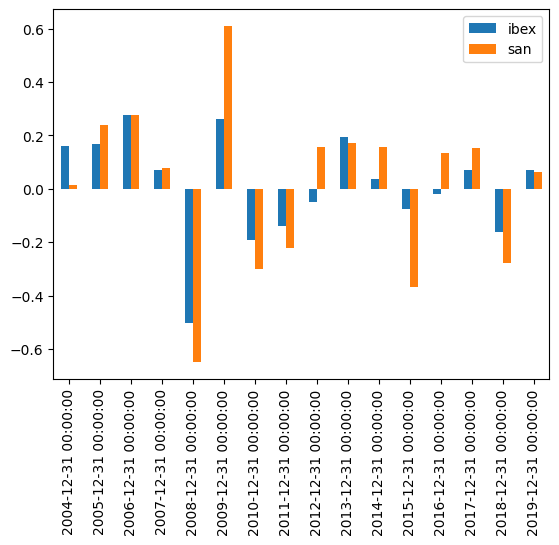

In [8]:
# para ejecutar en local
#san = pd.read_csv('data/SAN.csv', index_col=0, parse_dates=True).close

#para ejecutar en colab
san = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/SAN.csv', index_col=0, parse_dates=True).close

data = pd.concat([ibex, san], axis=1).dropna()
data.columns = ['ibex', 'san']
retornos_anuales = retorno_anualizado(data)
retornos_anuales.plot.bar()

Calcula la correlación del SAN, REE y NTGY con el IBEX con dividendos.

In [10]:
# para ejecutar en local
# ree = pd.read_csv('data/REE.csv', index_col=0, parse_dates=True).close
# ntgy = pd.read_csv('data/NTGY.csv', index_col=0, parse_dates=True).close

# para ejecutar en colab
ree = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/REE.csv', index_col=0, parse_dates=True).close
ntgy = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/NTGY.csv', index_col=0, parse_dates=True).close
data = pd.concat([ibex_div, san, ree, ntgy], axis=1).dropna()
data.columns = ['ibex_div', 'san', 'ree', 'ntgy']

In [63]:
corr_data = data.corr()

Ahora calcula la correlación rolada de 100 días para los activos del ejercico anterior.

In [64]:
corr_roll = correlacion(data, 100).dropna()

In [65]:
corr_roll

ibex_div       san       ree      ntgy
2005-11-22 ibex_div  1.000000  0.932820  0.709917 -0.403556
           san       0.932820  1.000000  0.550656 -0.557764
           ree       0.709917  0.550656  1.000000  0.080162
           ntgy     -0.403556 -0.557764  0.080162  1.000000
2005-11-23 ibex_div  1.000000  0.931653  0.736726 -0.405852
...                       ...       ...       ...       ...
2019-05-14 ntgy      0.832484  0.630218 -0.560497  1.000000
2019-05-15 ibex_div  1.000000  0.870032 -0.636553  0.819045
           san       0.870032  1.000000 -0.632097  0.602338
           ree      -0.636553 -0.632097  1.000000 -0.539171
           ntgy      0.819045  0.602338 -0.539171  1.000000

[13752 rows x 4 columns]

Calcula la beta de los 3 activos NTGY, REE y SAN, Recuerda:

$\beta = \frac{cov(R_m, R_s)}{var(R_m)}$

Donde $R_m$ y $R_s$ son la serie de retornos del índice y de la acción.

In [71]:
beta_data = beta(data, index_col=0)

In [72]:
beta_data

ibex_div    1.000000
san         1.292866
ree         0.552745
ntgy        0.756547
Name: ibex_div, dtype: float64

Ahora calcula la beta rolada de 100 días para los activos del ejercico anterior

Calcula la media movil de 30 y 200 dias de REE y realiza una figura junto con la serie de precios originales

Usando el precio de cierre del Ibex, calcula las velas mensuales y anuales.

Píntalas utilizando un gráfico.
